In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import wbdata

# A function that reads a file name and returns dataset in the neccessary format

def read_worldbank(filename):
    df = pd.read_csv(
                        filename , 
                        skiprows = 4
                    )
    df = df.set_index('Country Name')
    df = df.drop([
                    'Country Code' , 
                    'Indicator Code'
                    ] 
                    , axis = 1
                )
    df = df.T 
    return df

# Running the function
df = read_worldbank('./API_19_DS2_en_csv_v2_4754249.csv')
df.head()


Country Name,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Indicator Name,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $2.15 a day (2017 P...,"Prevalence of underweight, weight for age (% o...","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)","Primary completion rate, total (% of relevant ...",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (%...,Urban land area where elevation is below 5 met...,Urban land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.87269,28.396019,109850.0
1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.001939,28.615743,110700.0
1963,50.73,28763.0,0.788835,56699.0,0.823502,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.131188,28.835466,111550.0


Text(0, 0.5, 'Total Population')

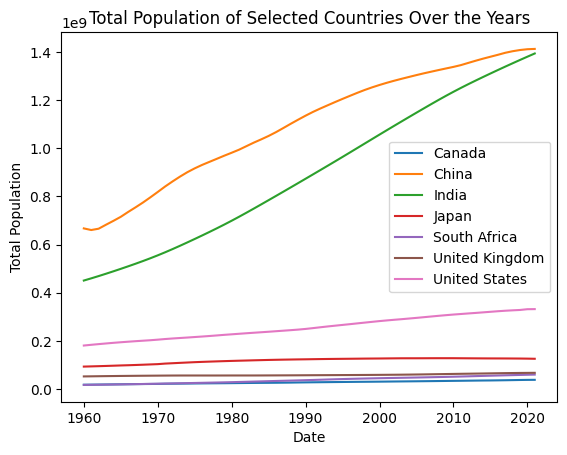

In [2]:
#set up the countries I want
countries = ["US",
    "IN",
    "CN",
    "JP",
    "CA",
    "GB",
    "ZA"
            ]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {
    "SP.POP.TOTL": "Total Population",
    "SP.POP.TOTL.FE.IN": "Female Population",
    "SP.POP.TOTL.MA.IN": "Male Population",
    "SP.DYN.CBRT.IN": "Birth Rate",
    "SP.DYN.CDRT.IN": "Death Rate",
    "SE.COM.DURS": "Compulsory Education Dur.",
    "SL.IND.EMPL.ZS":"Employment in Industry(%)",
    "SL.AGR.EMPL.ZS": "Employment in Agriculture(%)",
    "SL.AGR.EMPL.FE.ZS": "Female Employment in Agriculture(%)",
    "SL.IND.EMPL.FE.ZS": "Female Employment in Industry(%)",
    "SL.UEM.TOTL.ZS": "Unemployment(%)",
    "NY.GDP.MKTP.CD": "GDP in USD",
    "NY.ADJ.NNTY.PC.KD.ZG":"National Income per Capita",
    "NY.GSR.NFCY.CD":"Net income from Abroad",
    "NV.AGR.TOTL.CD":"Agriculture value added(in USD)",
    "EG.USE.ELEC.KH.PC":"Electric Power Consumption(kWH per capita)",
    "EG.FEC.RNEW.ZS":"Renewable Energy Consumption (%)",
    "EG.USE.COMM.FO.ZS":"Fossil Fuel Consumption (%)"
    }
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a matplotlib plot of GNI per Capita with legend, labels and a title
dfu["Total Population"].plot() 
plt.legend(loc='best') 
plt.title("Total Population of Selected Countries Over the Years") 
plt.xlabel('Date')
plt.ylabel("Total Population")

In [3]:
pop_2000 = pd.DataFrame(dfu.loc["2000"]["Total Population"])
pop_2018 = pd.DataFrame(dfu.loc["2018"]["Total Population"])
both = pop_2000.merge(pop_2018,on="country")
both.reset_index(inplace = True, drop = False)


<AxesSubplot: xlabel='country'>

<Figure size 700x500 with 0 Axes>

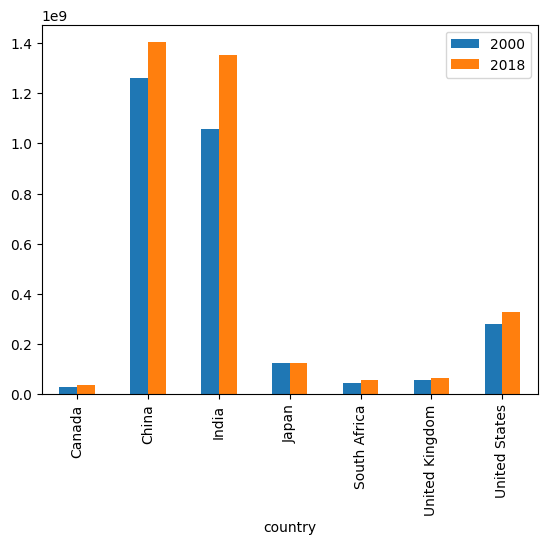

In [4]:
plt.figure(figsize=(7, 5))
# plot the chart using matplotlib.pyplot library
both.plot(kind='bar', x="country", y=["2000", "2018"])


In [5]:
def group_df(feature):
    # create a new dataframe
    df_grouped=pd.DataFrame()

    # find average for each country
    df_grouped['Avg. ' + feature]=df.groupby('country')[feature].mean()

    # set the index as a column - countries
    df_grouped['country']=df_grouped.index

    # drop the index
    df_grouped.reset_index(drop=True, inplace=True)

    # sort the rows based of Avg Birth rate
    df_grouped.sort_values('Avg. '+feature, inplace=True, ascending=False)

    print("Avg. " + feature)
    display(df_grouped)
    
    return df_grouped

def plot_bar(df, x_feature, y_feature):
    # bar plot
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    ax = sns.barplot(
        data= df,
        x= x_feature,
        y= "Avg. " + y_feature)



Avg. Birth Rate


,Avg. Birth Rate,country
2,30.651656,India
4,30.270803,South Africa
1,20.126885,China
6,15.447541,United States
0,14.452459,Canada
5,13.539344,United Kingdom
3,12.120000,Japan


Avg. Death Rate


,Avg. Death Rate,country
2,12.011049,India
4,11.777344,South Africa
5,10.818033,United Kingdom
6,8.770016,United States
3,7.641475,Japan
1,7.571803,China
0,7.265574,Canada


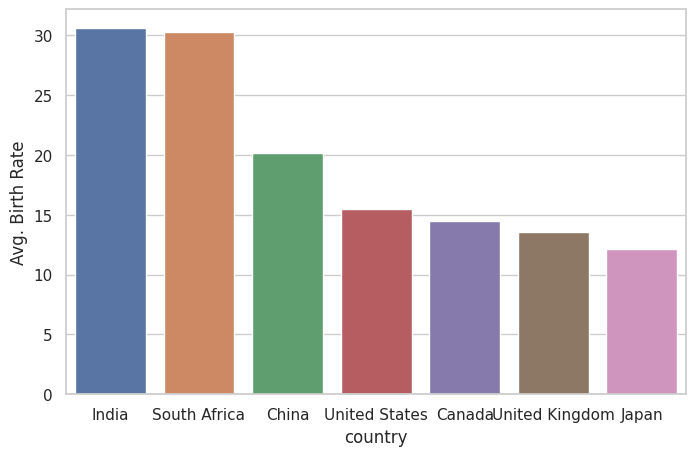

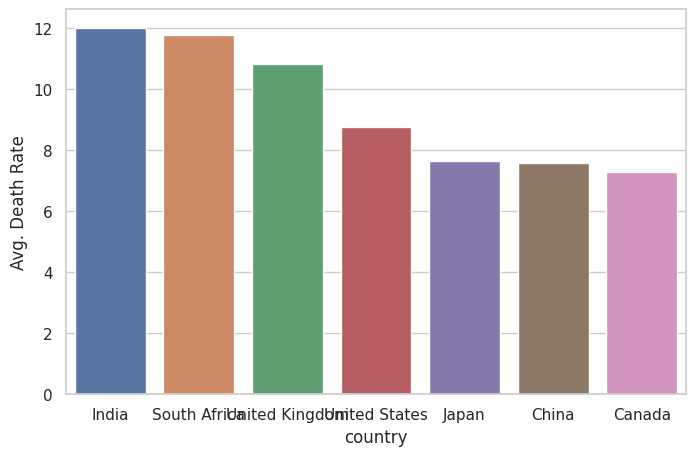

In [6]:
df_birth=group_df('Birth Rate')
plot_bar(df_birth, 'country', 'Birth Rate')

print("========================================================")
df_death=group_df('Death Rate')
plot_bar(df_death, 'country', 'Death Rate')

In [7]:
df

Total Population  Female Population  Male Population  \
country      date                                                         
Canada       2021        38246108.0         19259745.0       18986363.0   
             2020        38037204.0         19158588.0       18878616.0   
             2019        37601230.0         18943318.0       18657912.0   
             2018        37065084.0         18677663.0       18387421.0   
             2017        36545236.0         18419735.0       18125501.0   
...                             ...                ...              ...   
South Africa 1964        18896303.0          9495930.0        9400373.0   
             1963        18423157.0          9254686.0        9168471.0   
             1962        17965733.0          9020208.0        8945525.0   
             1961        17524533.0          8793188.0        8731345.0   
             1960        17099836.0          8574106.0        8525730.0   

                   Birth Rate  Death Rate  Compulsory Education Dur.  \
country      date                                                      
Canada       2021         NaN         NaN                       10.0   
             2020       9.400       8.100                       10.0   
             2019       9.900       7.600                       10.0   
             2018      10.100       7.700                       10.0   
             2017      10.300       7.500                       10.0   
...                       ...         ...                        ...   
South Africa 1964      40.152      16.233                        NaN   
             1963      40.419      16.527                        NaN   
             1962      40.663      16.816                        NaN   
             1961      40.882      17.104                        NaN   
             1960      41.075      17.398                        NaN   

                   Employment in Industry(%)  Employment in Agriculture(%)  \
country      date                                                            
Canada       2021                        NaN                           NaN   
             2020                        NaN                           NaN   
             2019                  19.250000                          1.51   
             2018                  19.570000                          1.49   
             2017                  19.530001                          1.52   
...                                      ...                           ...   
South Africa 1964                        NaN                           NaN   
             1963                        NaN                           NaN   
             1962                        NaN                           NaN   
             1961                        NaN                           NaN   
             1960                        NaN                           NaN   

                   Female Employment in Agriculture(%)  \
country      date                                        
Canada       2021                                  NaN   
             2020                                  NaN   
             2019                                 1.00   
             2018                                 0.94   
             2017                                 0.96   
...                                                ...   
South Africa 1964                                  NaN   
             1963                                  NaN   
             1962                                  NaN   
             1961                                  NaN   
             1960                                  NaN   

                   Female Employment in Industry(%)  Unemployment(%)  \
country      date                                                      
Canada       2021                               NaN             7.51   
             2020                               NaN             9.46   
             2019                              8

In [8]:
df.loc["India"]

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%)
date,,,,,,,,,,,,,,,,,,
2021,1.393409e+09,669435596.0,723973437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.978,3.173398e+12,NaN,-4.943081e+10,5.320760e+11,NaN,NaN,NaN
2020,1.380004e+09,662903415.0,717100970.0,17.437,7.301,8.0,NaN,NaN,NaN,NaN,7.997,2.667688e+12,-8.061203,-3.592959e+10,4.862909e+11,NaN,NaN,NaN
2019,1.366418e+09,656288184.0,710129572.0,17.644,7.265,8.0,25.120001,42.599998,54.689999,17.350000,5.270,2.831552e+12,3.298984,-2.723863e+10,4.736962e+11,NaN,32.93,NaN
2018,1.352642e+09,649586703.0,703055580.0,17.857,7.234,8.0,24.950001,43.330002,55.529999,17.280001,5.330,2.702930e+12,4.747289,-2.893537e+10,4.333237e+11,NaN,32.82,NaN
2017,1.338677e+09,642796257.0,695880522.0,18.083,7.210,8.0,24.860001,43.930000,56.349998,17.520000,5.358,2.651473e+12,7.251650,-2.867317e+10,4.390397e+11,NaN,32.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,4.888481e+08,236130821.0,252717318.0,40.898,20.096,NaN,NaN,NaN,NaN,NaN,NaN,5.648029e+10,NaN,-3.045003e+08,2.335105e+10,NaN,NaN,NaN
1963,4.788256e+08,231387194.0,247438408.0,41.200,20.608,NaN,NaN,NaN,NaN,NaN,NaN,4.842192e+10,NaN,-2.352002e+08,1.928420e+10,NaN,NaN,NaN
1962,4.690772e+08,226780736.0,242296455.0,41.484,21.126,NaN,NaN,NaN,NaN,NaN,NaN,4.216148e+10,NaN,-2.268002e+08,1.647079e+10,NaN,NaN,NaN


Few records from the Dataframe containing Year, GDP and Country:


,date,GDP in USD,country
0,2021,3.173398e+12,Canada
1,2020,2.667688e+12,Canada
2,2019,2.831552e+12,Canada
3,2018,2.702930e+12,Canada
4,2017,2.651473e+12,Canada


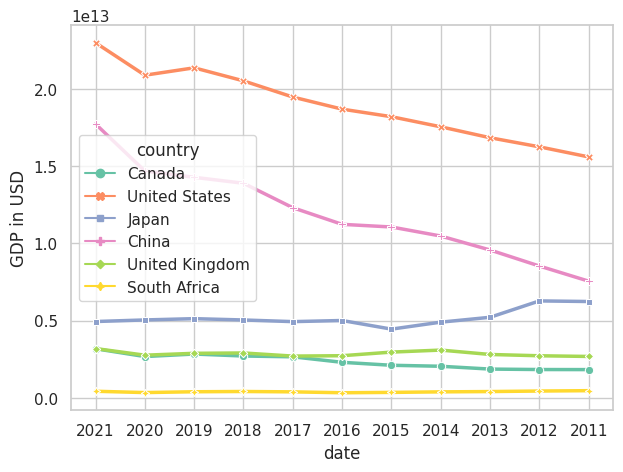

In [9]:
# function to to form a dataframe with Year, GDP and Country
def extract_columns(df_cleaned):
    df_cleaned.reset_index(inplace = True, drop = False)
    df1=pd.DataFrame()
    # pick data for the recent 10 years, note that the data sorted in descending order of year
    df1['date']=df_cleaned.loc[:10, 'date']
    df1['GDP in USD']=df_cleaned.loc[:10, 'GDP in USD']
    return df1

# function to fetch a single dataframe with 3 features from each country
def form_gdp_df():
    # function call to extract_columns()
    indf=extract_columns(df.loc["India"])
    indf['country']=pd.Series(["India" for x in range(len(indf.index))])
    usdf=extract_columns(df.loc["United States"])
    usdf['country']=pd.Series(["United States" for x in range(len(indf.index))])
    cndf=extract_columns(df.loc["Canada"])
    indf['country']=pd.Series(["Canada" for x in range(len(indf.index))])
    jpdf=extract_columns(df.loc["Japan"])
    jpdf['country']=pd.Series(["Japan" for x in range(len(indf.index))])
    cadf=extract_columns(df.loc["China"])
    cadf['country']=pd.Series(["China" for x in range(len(indf.index))])
    gbdf=extract_columns(df.loc["United Kingdom"])
    gbdf['country']=pd.Series(["United Kingdom" for x in range(len(indf.index))])
    zadf=extract_columns(df.loc["South Africa"])
    zadf['country']=pd.Series(["South Africa" for x in range(len(indf.index))])
    # combine the 7 dfs into a single df with 3 columns
    # we ignore the original index
    gdp_df=pd.concat([indf, usdf, cndf, jpdf, cadf, gbdf, zadf], ignore_index=True)
    return gdp_df

# get the combined DF
gdp_df=form_gdp_df()

print("Few records from the Dataframe containing Year, GDP and Country:")
display(gdp_df.head())

# set figure size
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
# plot using seaborn library
ax=sns.lineplot(x='date', y='GDP in USD', hue='country', style="country",palette="Set2", markers=True, dashes=False, data=gdp_df, linewidth=2.5)


Few records from the selected features: 


/tmp/ipykernel_10257/3777545485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indf['country']=pd.Series(["India" for x in range(len(indf.index))])
/tmp/ipykernel_10257/3777545485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cndf['country']=pd.Series(["China" for x in range(len(cndf.index))])


,Total Population,Electric Power Consumption(kWH per capita),country
0,1.393409e+09,NaN,India
1,1.380004e+09,NaN,India
2,1.366418e+09,NaN,India
3,1.352642e+09,NaN,India
4,1.338677e+09,NaN,India


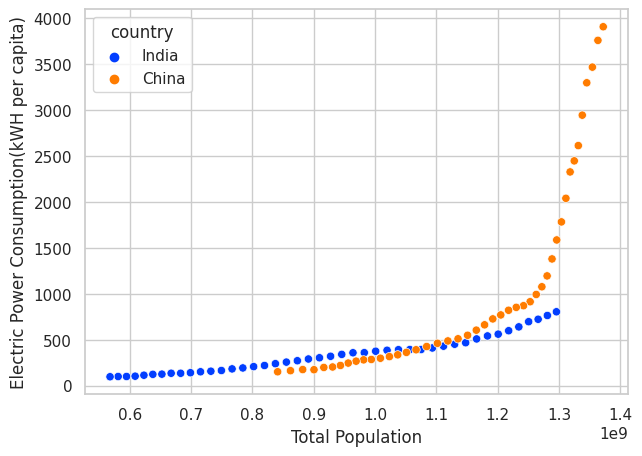

In [10]:
# function to extract specific columns from the DFs for India and China
def form_in_cn_df():
    # for India
    ind=df.loc["India"]
    ind.reset_index(inplace = True, drop = False)
    indf=ind[['Total Population', 'Electric Power Consumption(kWH per capita)']]
    indf['country']=pd.Series(["India" for x in range(len(indf.index))])
    # for China
    cn=df.loc["China"]
    cn.reset_index(inplace = True, drop = False)
    cndf=cn[['Total Population', 'Electric Power Consumption(kWH per capita)']]
    cndf['country']=pd.Series(["China" for x in range(len(cndf.index))])
    # combine the two dataframes
    in_cn_df=pd.concat([indf, cndf])
    return in_cn_df

# get the desired data
in_cn_df=form_in_cn_df()
print("Few records from the selected features: ")
display(in_cn_df.head())

# scatter plot
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='Total Population', y='Electric Power Consumption(kWH per capita)', hue='country', palette="bright", data=in_cn_df)



First few records of the data: 


,Total Population,Electric Power Consumption(kWH per capita)
0,38246108.0,NaN
1,38037204.0,NaN
2,37601230.0,NaN
3,37065084.0,NaN
4,36545236.0,NaN


/tmp/ipykernel_10257/1945722450.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Total Population', y='Electric Power Consumption(kWH per capita)', palette="colorblind",data=cadf, linewidth=2.5)


<AxesSubplot: xlabel='Total Population', ylabel='Electric Power Consumption(kWH per capita)'>

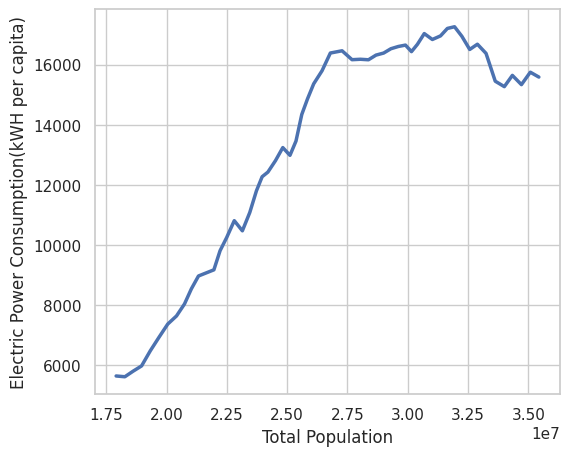

In [11]:
# read the columns from the df for Canada
cad=df.loc["Canada"]
cad.reset_index(inplace = True, drop = False)
cadf=cad[['Total Population','Electric Power Consumption(kWH per capita)']]


print("First few records of the data: ")
display(cadf.head())

# line plot
plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
sns.lineplot(x='Total Population', y='Electric Power Consumption(kWH per capita)', palette="colorblind",data=cadf, linewidth=2.5)


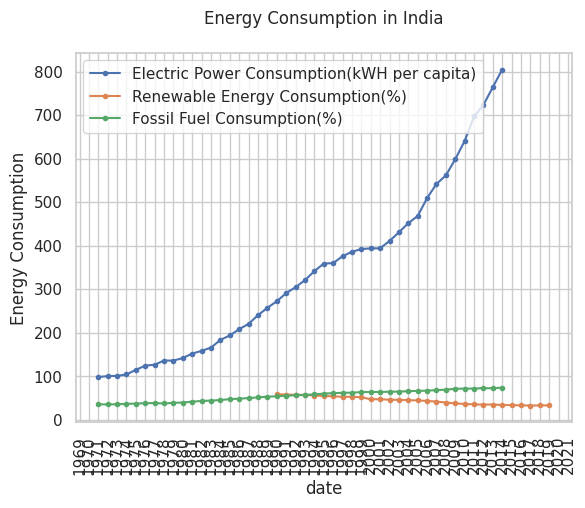

In [12]:
# Pick the columns Year, and 3 different power consumptions from the dataframe for russia
b=df.loc["India"]
b.reset_index(inplace = True, drop = False)
# Pick the columns Year, and 3 different power consumptions from the dataframe for russia
plt.plot(b['date'],b['Electric Power Consumption(kWH per capita)'],'.-')
plt.plot(b['date'],b['Renewable Energy Consumption (%)'],'.-')
plt.plot(b['date'],b['Fossil Fuel Consumption (%)'],'.-')

plt.legend(['Electric Power Consumption(kWH per capita)', 'Renewable Energy Consumption(%)', 'Fossil Fuel Consumption(%)'], loc='best')
plt.title("Energy Consumption in India\n")
plt.xlabel('date')
plt.gca().invert_xaxis()
plt.xticks(rotation = 90)
plt.ylabel('Energy Consumption')
plt.show()
